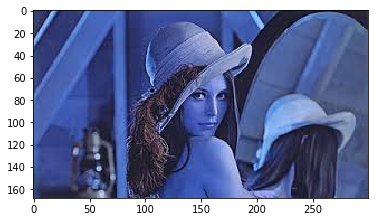

In [2]:
# -*- coding: utf-8 -*

%matplotlib inline
import cv2
import matplotlib.pyplot as plt

MAX_CORNERS = 50
BLOCK_SIZE = 3
QUALITY_LEVEL = 0.01
MIN_DISTANCE = 20.0

img = cv2.imread('./data/lena.jpg')
# img = cv2.imread('./dev_images/IMG_3082.jpg')
plt.imshow(img)

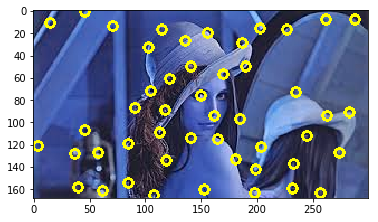

In [3]:
if img is None:
    print ('ファイルを読み込めません。')
    import sys
    sys.exit()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, MAX_CORNERS, QUALITY_LEVEL, MIN_DISTANCE,
                                  blockSize = BLOCK_SIZE, useHarrisDetector = False)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y), 4, (255, 255, 0), 2)

# cv2.imwrite('c:/temp/corners.jpg', img)
# cv2.imshow('img', img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

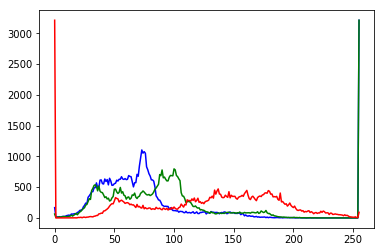

In [4]:
# ヒストグラム表記
color_names = ['blue', 'green', 'red']
for i, j in enumerate(color_names):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=j)

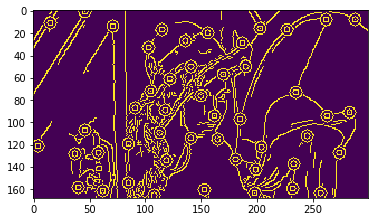

In [6]:
# エッジ検出
edges = cv2.Canny(img,100,200)

# 画像を表示
plt.imshow(edges)

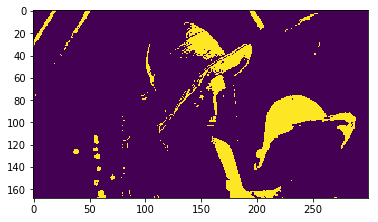

In [7]:
# 画像の読込(グレースケール読込)
image = cv2.imread('./data/lena.jpg', 0)

# 閾値を指定
threshhold = 150

# 2値化(retvalに使用した閾値が、binary_imageに2値化した画像が入る)
# この場合はthreshholdを指定しているのでretvalに同じ値が入るが、
# cv2.THRESH_OTSU(大津の二値化)等の自動でthreshholdを算出する場合にretvalの値を使う。
retval, binary_image = cv2.threshold(image, threshhold, 255, cv2.THRESH_BINARY)

# 画像を表示
plt.imshow(binary_image)